In [139]:
import numpy as np
from scipy.optimize import curve_fit
import scipy.signal
import scipy.integrate as integrate
import matplotlib.pyplot as plt
from BinaryFileUnpack import BinaryFileUnpack
import warnings

In [140]:
# Function to get decreasing midline of damping function
def midline(t, c, d):
    # c is initial pressure
    # d quantifies the rate of decrease of pressure
    return c*np.exp(-d * t)

# Fitting damping model to data
def damping(t, A, gamma, omega, phi, c, d):
    warnings.filterwarnings('ignore')
    # First term is equation for damped harmonic motion
    # Second term (midline function) accounts for the gradual loss of pressure in the geyser
    return A * np.exp(-gamma*t) * np.cos(omega*t - phi) + midline(t, c, d)

# Identifying and obtaining parameters for periodic motion based off damping function
def periodic_range(func, time, ydata, fs:int, time_range=5, sens_ind=2):
    std_dev = []  # Standard deviation of the parameters
    params = []  # Parameters of damped harmonic motion with pressure loss
    
    # Identify the maximum point in the data set, as this is where the pertubation ends and HM starts
    max_ind = np.argmax(ydata[sens_ind])
    start = time[max_ind]
    done = False
    while not done:
        end = start + time_range
        if end > time[-1] or start < time[0]:
            break
        
        s = int(start*fs)
        e = int(end*fs)
        
        try:
            popt, pcov = curve_fit(func, time[0:e-s], ydata[sens_ind, s:e])
        except RuntimeError:  # Least-Squares Regression does not work in range
            if time_range < 8:
                time_range += 0.5
            else:
                start -= 0.025
        else:
            # Harmonic motion detected, can assign parameters and std. dev.      
            std_dev = np.sqrt(np.diag(pcov))
            # Approximating error
            err_omega = std_dev / np.sqrt(e-s)
            if (2*err_omega[2] > 0.1*popt[2]):
                if time_range < 8:
                    time_range += 0.5
                else:
                    start -= 0.025
            else:
                done = True
            params = popt
            

    return params, std_dev, start, end

## Test of methods
# res = 1
# if fs > 1000:
#     res *= int(fs//1000)
# print(analysis.time[::res].shape, analysis.P[:, ::res].shape)

# popt, std_dev, start, end = periodic_range(damping, analysis.time[::res], analysis.P[:, ::res], 1000, 2)

# print(f"Duration: {start} to {end}\nomega = {popt[2]}\nstd_dev = {std_dev[2]}")

# s = int(start*fs)
# e = int((start+8) * fs)
# plt.plot(analysis.time[:e-s], analysis.P[2, s:e])
# plt.plot(analysis.time[:e-s], damping(analysis.time[0:e-s], *popt))

For X24cm, Y10cm:
	Duration: 26.222 to 31.222
	omega = 3.6151910167151655
	std_dev = 0.005519127243731244


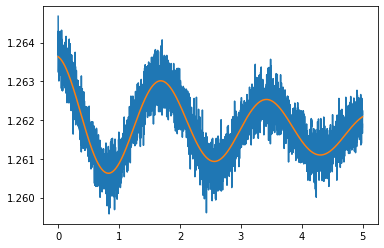

For X24cm, Y20cm:
	Duration: 26.458000000000002 to 31.458000000000002
	omega = 3.357090661711004
	std_dev = 0.004960687809494958


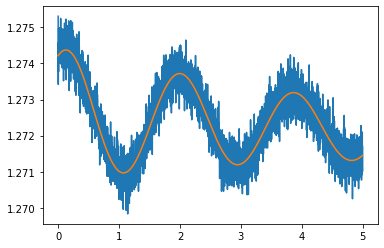

For X24cm, Y30cm:
	Duration: 20.434 to 25.434
	omega = 3.199594463605761
	std_dev = 0.006993797915982345


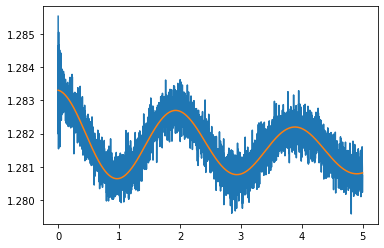

For X24cm, Y40cm:
	Duration: 11.137 to 16.137
	omega = 3.033926150039331
	std_dev = 0.005821978856390359


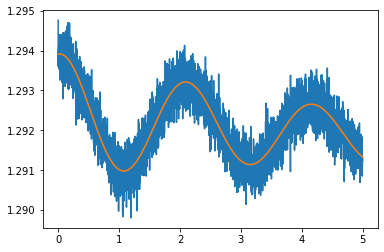

For X24cm, Y52cm:
	Duration: 12.106 to 17.606
	omega = 2.883252825498417
	std_dev = 0.015335195182486654


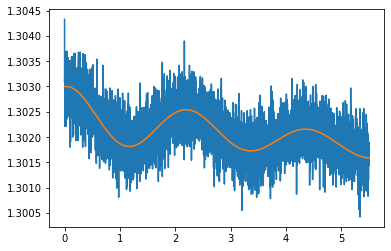

For X24cm, Y60cm:
	Duration: 5.881 to 13.881
	omega = 2.8064434453815137
	std_dev = 0.006881378751813772


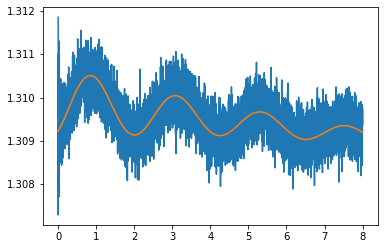

For X24cm, Y70cm:
	Duration: 6.088 to 11.088000000000001
	omega = 2.735886824117879
	std_dev = 0.022021261263733233


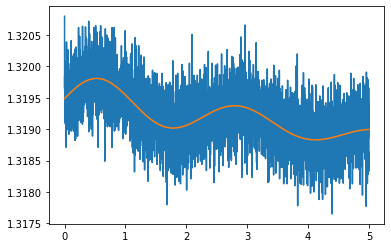

For X36cm, Y10cm:
	Duration: 36.048 to 41.048
	omega = 3.625545155991966
	std_dev = 0.005726697460342108


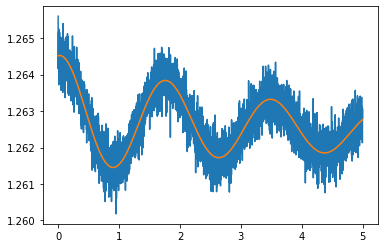

For X36cm, Y20cm:
	Duration: 10.957 to 15.957
	omega = 3.227086055011859
	std_dev = 0.007020457981496557


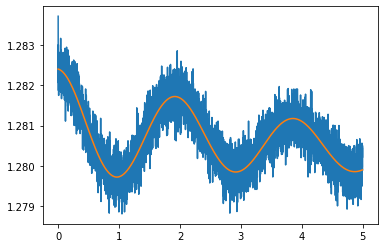

For X36cm, Y30cm:
	Duration: 11.746 to 16.746000000000002
	omega = 3.379176271005473
	std_dev = 0.004304327659915206


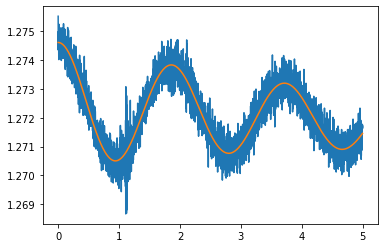

For X36cm, Y40cm:
	Duration: 5.782 to 13.782
	omega = 3.0693885216386385
	std_dev = 0.003836645228191385


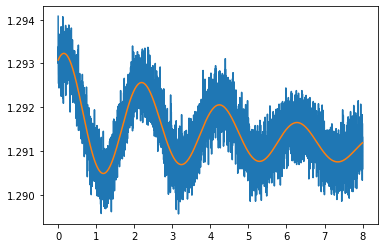

For X36cm, Y52cm:
	Duration: 2.232 to 10.232
	omega = 2.9152626488868423
	std_dev = 0.006555496996982914


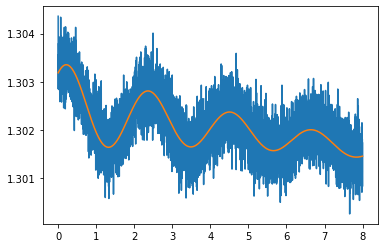

For X36cm, Y60cm:
	Duration: 14.152000000000001 to 19.152
	omega = 2.8322977410348678
	std_dev = 0.012938807461630002


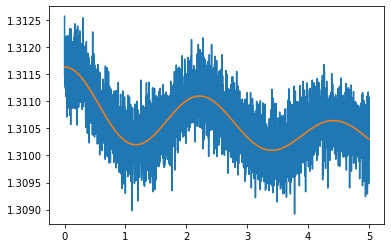

For X36cm, Y70cm:
	Duration: 9.061 to 14.561
	omega = 2.7149796243155278
	std_dev = 0.011362286029964282


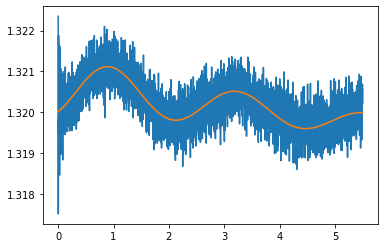

For X48cm, Y10in:
	Duration: 5.089 to 10.089
	omega = 3.383116507461117
	std_dev = 0.004068588599975805


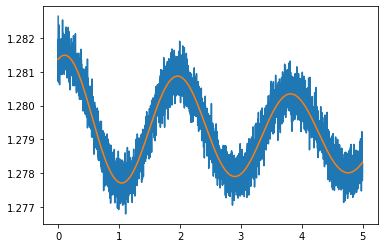

For X48cm, Y15in:
	Duration: 32.606 to 40.606
	omega = 2.9725517995147235
	std_dev = 0.0009263068579430519


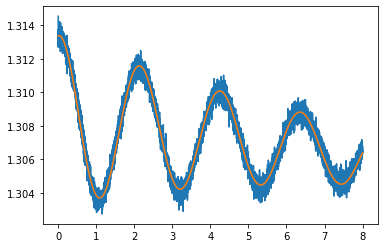

For X48cm, Y21in:
	Duration: 12.94 to 17.939999999999998
	omega = 2.995025040611266
	std_dev = 0.006911379628453229


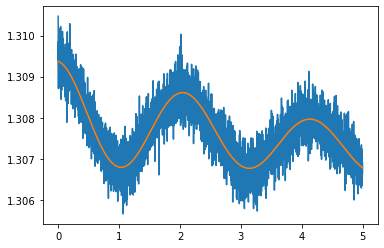

For X48cm, Y25in:
	Duration: 5.425 to 10.425
	omega = 2.807767086548524
	std_dev = 0.005671743666905863


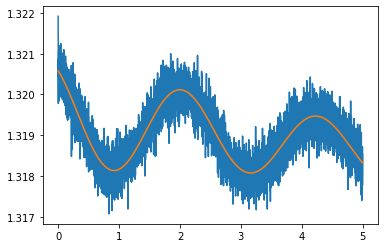

For X48cm, Y32in:
	Duration: 3.086 to 8.586
	omega = 2.6782772961098873
	std_dev = 0.0032970286207156725


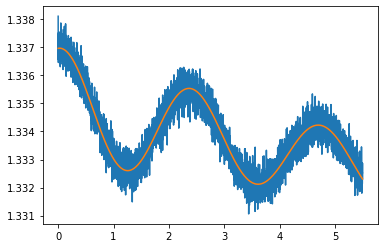

For X48cm, Y6in:
	Duration: 18.893 to 23.893
	omega = 3.490356167645443
	std_dev = 0.0028155452787932606


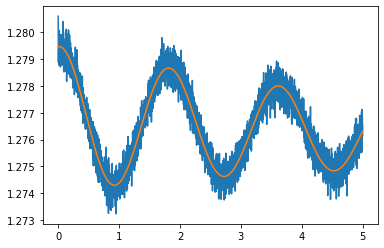

For X60cm, Y17in:
	Duration: 3.339 to 8.339
	omega = 3.2817585559711975
	std_dev = 0.0061581886367916274


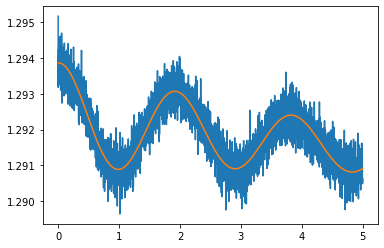

For X60cm, Y23in:
	Duration: 7.484 to 12.984
	omega = 3.049315728067755
	std_dev = 0.004936267215959533


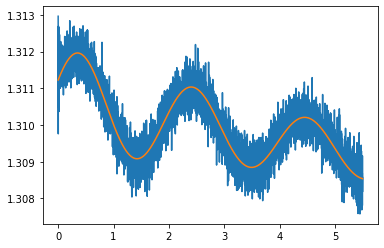

For X60cm, Y27in:
	Duration: 5.118 to 10.118
	omega = 2.8117421447143522
	std_dev = 0.00225086746880541


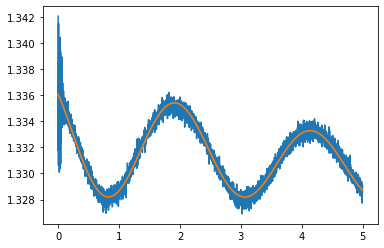

For X60cm, Y27in:
	Duration: 4.03 to 9.030000000000001
	omega = 2.8655571314178525
	std_dev = 0.0016291131487364211


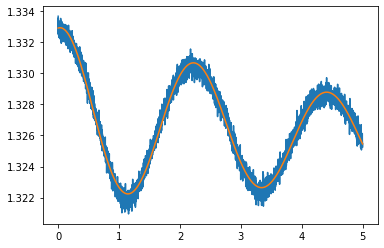

For X60cm, Y30in:
	Duration: 4.276 to 12.276
	omega = 2.8472792461284677
	std_dev = 0.002737304132452713


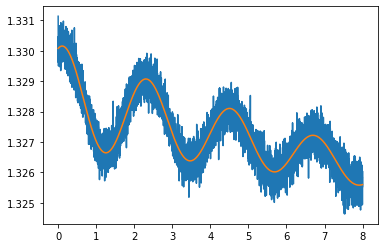

For X60cm, Y4in:
	Duration: 3.4410000000000003 to 8.441
	omega = 3.7380655475534863
	std_dev = 0.0016733781709515666


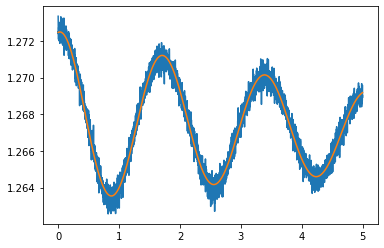

For X60cm, Y7in:
	Duration: 20.231 to 25.231
	omega = 3.620102352102961
	std_dev = 0.00355488745952614


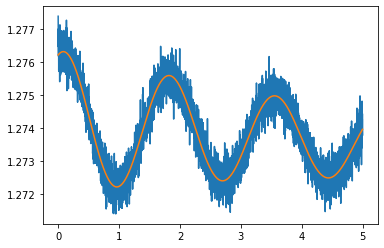

For X70cm, Y10in:
	Duration: 1.953 to 6.953
	omega = 3.8741372845068005
	std_dev = 0.004910268706323498


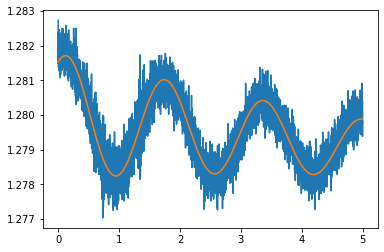

For X70cm, Y15in:
	Duration: 2.7760000000000002 to 7.776
	omega = 3.5585343264553337
	std_dev = 0.0026702425540524296


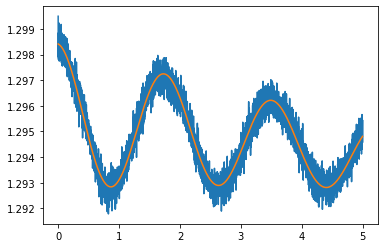

For X70cm, Y23in:
	Duration: 22.577 to 27.577
	omega = 3.266266435667333
	std_dev = 0.003695187455994766


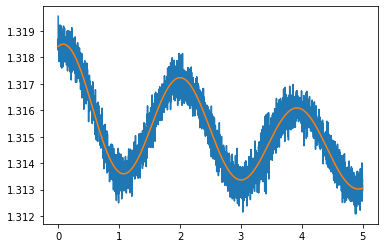

For X70cm, Y31in:
	Duration: 3.5740000000000003 to 9.074
	omega = 3.058929289832794
	std_dev = 0.0038917130874131416


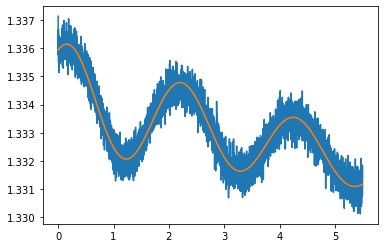

For X70cm, Y5in:
	Duration: 58.696 to 63.696
	omega = 4.104925096865461
	std_dev = 0.0034032896711430507


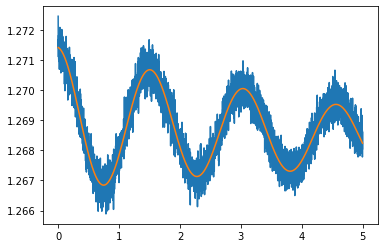

In [141]:
import os

# Keep track of the home directory
parent_dir = "C:\\Users\\akyap\\OneDrive\\Documents\\Academics\\Research\\LDEO Geysers\\files\\tests\\cold-water"
os.chdir(parent_dir)

# Name of directory that holds data
# os.chdir()

# Get all the subdirectories in the directory
dirs_raw = filter(lambda file: '.' not in file, os.listdir())

# Directory names must be in the format: "X{number}{'cm' or 'in'}"
dirs = []
for dir in dirs_raw:
    if dir[0] == 'X' and dir[1:-2].isnumeric():
        unit = dir[-2:] 
        if unit == 'cm' or unit == 'in':
            dirs.append(dir)

# List that stores all the test data, seperated by commas (,), to be dumped into .csv
# Header information for data string.
test_summary = ['X (cm),Y (cm),Adjusted Y,start,end,A,damp_factor,omega,phi,c,d,stdev-A,stdev-damp,stdev-omega,stdev-phi,stdev-c,stdev-d']

lowpass = False  # True if lowpass filter is implemented
verbose = True  # True if verobose output and graphs is needed
savefig = False  # True if plot is to be saved
for dir in dirs:
    os.chdir(dir)
    for file in os.listdir():
        try: name, ext = file.split('.')
        except ValueError: pass  # Not a file
        else: 
            if ext == 'bin':  # Analyze .bin files
                # File format is 'DAQ_{dir}_Y{y_value}-{date}-{time}.bin'
                # Use str.split accordingly to get y_value
                x_value = name.split('-')[0].split('_')[ 1][1:]
                y_value = name.split('-')[0].split('_')[-1][1:]

                x = float(x_value[:-2])
                y = float(y_value[:-2])

                if x_value[-2:] == 'in':
                    x *= 2.54

                if y_value[-2:] == 'in':
                    y *= 2.54

                if verbose: print(f"For {dir}, Y{y_value}:")
                
                # Get file details with BinaryFileUnpack class
                obj = BinaryFileUnpack(file)
                fs = int(obj.fs)
                # Force data at 1 kHz for analysis
                res = 1
                if fs > 1000:
                    res *= int(fs//1000)
                
                # Look at data for sensor 3
                sens_ind = 2
                data = obj.P
                if lowpass:
                    # Implement a lowpass filter
                    bound_freq = 1
                    nyq_freq = obj.fs // 2
                    b, a = scipy.signal.butter(3, bound_freq/nyq_freq, 'lowpass')
                    
                    filteredP = np.empty(obj.P.shape)
                    for i in range(filteredP.shape[0]):
                        filteredP[i] = scipy.signal.filtfilt(b, a, obj.P[i])
                    data = filteredP

                popt, std_dev, start, end = periodic_range(damping, obj.time[::res], data[:, ::res], 1000, sens_ind=sens_ind)
                
                # Use average value eq on c + np.exp(-d*t) to find average Y
                popt_mid = popt[-2:]
                y_avg = (1 / (end - start) * integrate.quad(lambda t: midline(t, *popt_mid), 0, end - start)[0] - 1.252) * 1e5/98

                # Getting data string for the csv file
                data_string = f"{x},{y},{y_avg+3},{start},{end},{','.join([str(param) for param in popt])},{','.join([str(sd) for sd in std_dev])}"
                test_summary.append(data_string)

                s = int(start * fs)
                e = int(end * fs)
                plt.plot(obj.time[:e-s], data[sens_ind, s:e])
                plt.plot(obj.time[:e-s], damping(obj.time[:e-s], *popt))
                
                if verbose: 
                    print(f"\tDuration: {start} to {end}\n\tomega = {popt[2]}\n\tstd_dev = {std_dev[2]}")
                    plt.show()

                if savefig: plt.savefig(f"X{x_value}_Y{y_value}.png")
                
    os.chdir('../')

os.chdir(parent_dir)

In [142]:
# Writing to .csv file
csv_name = 'cold-water-freq-orig.csv'
if lowpass:
    csv_name = 'cold-water-freq-filtered.csv'
with open(csv_name, 'w') as file_write:
    for test in test_summary:
        file_write.write(test + '\n')